In [23]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [24]:
target_user = ("@CBSNews","@CNN","@FoxNews","@NYTimes","@BBCBreaking")


In [25]:
# Target Account

# Counter
counter = 0

# Variables for holding sentiments
sentiments = []

# Variable for max_id
oldest_tweet = None
for target in target_user:
    counter=0
# Loop through 5 pages of tweets (total 100 tweets)
   #oldest_tweet = None
    for x in range(5):

    # Get all tweets from home feed
        public_tweets = api.user_timeline(target,max_id=oldest_tweet)

    # Loop through all tweets 
        for tweet in public_tweets:
        
        # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
    
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
            sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "User":target,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                            "Tweet":tweet["text"],
                           "Tweets Ago": counter})
        
        # Add to counter 
            counter += 1
print(sentiments)

[{'Date': 'Tue Jul 31 00:00:01 +0000 2018', 'Compound': -0.128, 'User': '@CBSNews', 'Positive': 0.076, 'Negative': 0.819, 'Neutral': 0.105, 'Tweet': 'Lawmakers want answers about controversial TSA program "Quiet Skies" that tracked airline passengers, including man… https://t.co/P16kKKElF4', 'Tweets Ago': 0}, {'Date': 'Mon Jul 30 23:39:31 +0000 2018', 'Compound': 0.0, 'User': '@CBSNews', 'Positive': 0.0, 'Negative': 1.0, 'Neutral': 0.0, 'Tweet': 'Claims in NFL concussion settlement hit $500 million in less than 2 years https://t.co/AH9sVuVV1M https://t.co/9jug8aQ6Gi', 'Tweets Ago': 1}, {'Date': 'Mon Jul 30 23:19:38 +0000 2018', 'Compound': 0.5574, 'User': '@CBSNews', 'Positive': 0.187, 'Negative': 0.813, 'Neutral': 0.0, 'Tweet': 'The Red Cross offers Amazon gift cards to those who donate blood in the next 30 days, after the nonprofit announced… https://t.co/NxdFsoTJuT', 'Tweets Ago': 2}, {'Date': 'Mon Jul 30 22:59:40 +0000 2018', 'Compound': 0.2263, 'User': '@CBSNews', 'Positive': 0.09

In [60]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd

sentiments_pd.to_csv("All Tweets.csv", index=False, header=True)

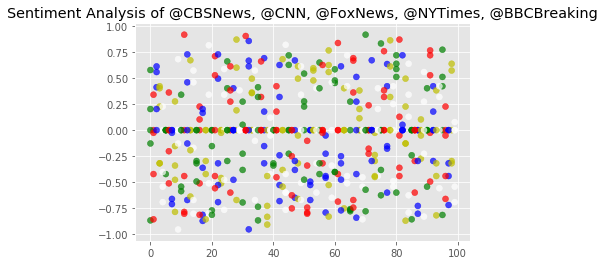

In [58]:
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
plt.scatter(x_vals,
         y_vals, marker="o",c=["g","r","b","y","w"],
         alpha=0.7)

plt.title(f"Sentiment Analysis of \
{target_user[0]}, {target_user[1]}, {target_user[2]}, {target_user[3]}, {target_user[4]}")

plt.savefig("ScatterPlot.png")

In [37]:
sentiments_pd.groupby(["User"]).mean()

,Compound,Negative,Neutral,Positive,Tweets Ago
User,,,,,
@BBCBreaking,-0.036484,0.81793,0.10543,0.07665,49.5
@CBSNews,-0.074218,0.84117,0.09396,0.06484,49.5
@CNN,-0.151229,0.84575,0.10652,0.04770,49.5
@FoxNews,0.065158,0.82953,0.07343,0.09704,49.5
@NYTimes,-0.086559,0.84047,0.09562,0.06391,49.5


In [40]:
grouped_sentiments =sentiments_pd.groupby(['User'])


In [41]:
average_sentiments = grouped_sentiments["Compound"].mean()
average_sentiments



User
@BBCBreaking   -0.036484
@CBSNews       -0.074218
@CNN           -0.151229
@FoxNews        0.065158
@NYTimes       -0.086559
Name: Compound, dtype: float64

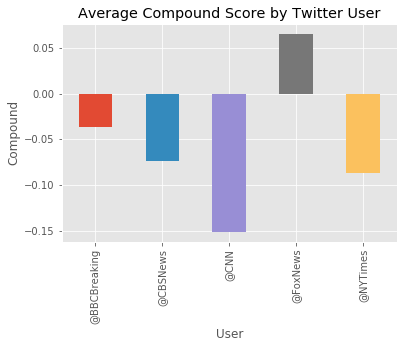

<Figure size 432x288 with 0 Axes>

In [59]:
user_chart = average_sentiments.plot(kind="bar", title="Average Compound Score by Twitter User")
user_chart.set_xlabel("User")
user_chart.set_ylabel("Compound")

plt.show()
plt.tight_layout()
plt.savefig("BarChart.png")